In [31]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.model_selection import train_test_split


In [32]:
df  = pd.read_csv('./songs.csv', encoding='latin1')
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [34]:
# drop columns with more than 50% missing values
columns_to_drop = df.columns[df.isnull().mean() > 0.5]
df_cleaned = df.drop(columns=columns_to_drop)

# impute missing values using median
critical_columns = [
    "Spotify Playlist Count", "Spotify Playlist Reach", "TikTok Views", "TikTok Likes", "TikTok Posts"
]

for col in critical_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

df_cleaned.info(), df_cleaned.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4600 non-null   float64
 9   Spotify Playlist Reach      4600 non-null   float64
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                4600 

C:\Users\hello\AppData\Local\Temp\ipykernel_53096\187439015.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)  # Impute with median


(None,
 Track                            0
 Album Name                       0
 Artist                           5
 Release Date                     0
 ISRC                             0
 All Time Rank                    0
 Track Score                      0
 Spotify Streams                113
 Spotify Playlist Count           0
 Spotify Playlist Reach           0
 Spotify Popularity             804
 YouTube Views                  308
 YouTube Likes                  315
 TikTok Posts                     0
 TikTok Likes                     0
 TikTok Views                     0
 YouTube Playlist Reach        1009
 Apple Music Playlist Count     561
 AirPlay Spins                  498
 SiriusXM Spins                2123
 Deezer Playlist Count          921
 Deezer Playlist Reach          928
 Amazon Playlist Count         1055
 Pandora Streams               1106
 Pandora Track Stations        1268
 Shazam Counts                  577
 Explicit Track                   0
 dtype: int64)

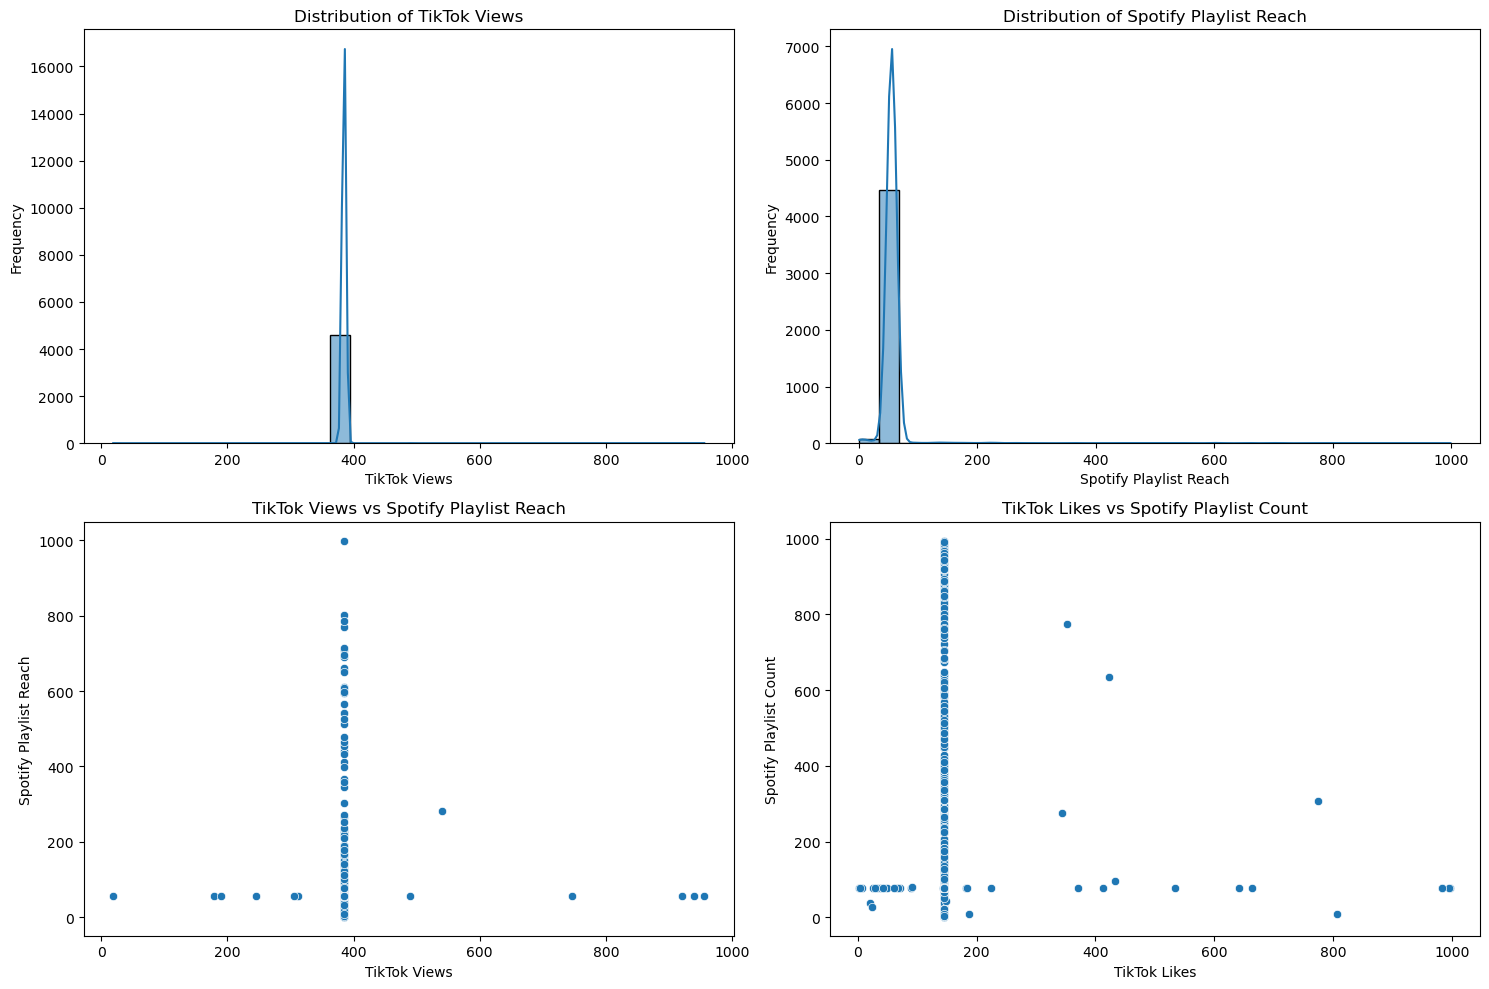

In [35]:
# EDA
plt.figure(figsize=(15, 10))

# Distribution of TikTok Views
plt.subplot(2, 2, 1)
sns.histplot(df_cleaned['TikTok Views'], bins=30, kde=True)
plt.title("Distribution of TikTok Views")
plt.xlabel("TikTok Views")
plt.ylabel("Frequency")

# Distribution of Spotify Playlist Reach
plt.subplot(2, 2, 2)
sns.histplot(df_cleaned['Spotify Playlist Reach'], bins=30, kde=True)
plt.title("Distribution of Spotify Playlist Reach")
plt.xlabel("Spotify Playlist Reach")
plt.ylabel("Frequency")

# TikTok Views vs Spotify Playlist Reach
plt.subplot(2, 2, 3)
sns.scatterplot(x=df_cleaned['TikTok Views'], y=df_cleaned['Spotify Playlist Reach'])
plt.title("TikTok Views vs Spotify Playlist Reach")
plt.xlabel("TikTok Views")
plt.ylabel("Spotify Playlist Reach")

# TikTok Likes vs Spotify Playlist Count
plt.subplot(2, 2, 4)
sns.scatterplot(x=df_cleaned['TikTok Likes'], y=df_cleaned['Spotify Playlist Count'])
plt.title("TikTok Likes vs Spotify Playlist Count")
plt.xlabel("TikTok Likes")
plt.ylabel("Spotify Playlist Count")

plt.tight_layout()
plt.show()


In [42]:
# Causal Inference - Propensity Score Matching
# treatment = high TikTok engagement
# median TikTok Views to define high vs low engagement
treatment_threshold = df_cleaned['TikTok Views'].median()
df_cleaned['Treatment'] = (df_cleaned['TikTok Views'] > treatment_threshold).astype(int)

# Features for propensity score model
propensity_features = ['TikTok Likes', 'TikTok Posts', 'Spotify Playlist Count']

# Logistic Regression for propensity score estimation
logit_model = LogisticRegression()
logit_model.fit(df_cleaned[propensity_features], df_cleaned['Treatment'])

# Predicted propensity scores
df_cleaned['Propensity Score'] = logit_model.predict_proba(df_cleaned[propensity_features])[:, 1]

# Matching high-engagement tracks (treatment group) with low-engagement tracks (control group)
treatment_indices = df_cleaned[df_cleaned['Treatment'] == 1].index
control_indices = df_cleaned[df_cleaned['Treatment'] == 0].index

# Nearest Neighbor Matching using Propensity Scores
nn = NearestNeighbors(n_neighbors=1)
nn.fit(df_cleaned.loc[control_indices, ['Propensity Score']])

# find matches
distances, matches = nn.kneighbors(df_cleaned.loc[treatment_indices, ['Propensity Score']])
matched_pairs = pd.DataFrame({
    'Treatment Index': treatment_indices,
    'Control Index': control_indices[matches.flatten()]
})

# average spotify playlist reach diff between matched pairs
treatment_reach = df_cleaned.loc[matched_pairs['Treatment Index'], 'Spotify Playlist Reach'].values
control_reach = df_cleaned.loc[matched_pairs['Control Index'], 'Spotify Playlist Reach'].values
average_treatment_effect = np.mean(treatment_reach - control_reach)

average_treatment_effect


37.916666666666664

In [44]:
# Step 1: Feature Engineering - Add new features
# Example transformations and feature combinations
df_cleaned['Engagement Rate'] = df_cleaned['TikTok Likes'] / (df_cleaned['TikTok Views'] + 1) 
df_cleaned['Cross-Platform Reach'] = (
    df_cleaned['Spotify Playlist Reach'] +
    df_cleaned['Apple Music Playlist Count'].fillna(0) +
    df_cleaned['Deezer Playlist Count'].fillna(0)
)
df_cleaned['Track Age'] = pd.to_datetime('2024-11-08') - pd.to_datetime(df_cleaned['Release Date']) 
df_cleaned['Track Age'] = df_cleaned['Track Age'].dt.days 

features = df_cleaned[
    ['TikTok Views', 'TikTok Likes', 'TikTok Posts', 'Spotify Playlist Count',
     'Engagement Rate', 'Cross-Platform Reach', 'Track Age', 'Explicit Track']
]
target_refined = df_cleaned['Spotify Playlist Reach']

# Step 2: Train-test split
X_train_refined, X_test_refined, y_train_refined, y_test_refined = train_test_split(features, target_refined, test_size=0.2, random_state=42)

# Step 3: Re-train Random Forest model with refined features
rf_model_refined = RandomForestRegressor(random_state=42)
rf_model_refined.fit(X_train_refined, y_train_refined)
rf_preds_refined = rf_model_refined.predict(X_test_refined)

# Random Forest Evaluation (Refined)
rf_mse_refined = mean_squared_error(y_test_refined, rf_preds_refined)
rf_r2_refined = r2_score(y_test_refined, rf_preds_refined)

# Step 4: Re-train GLM (Negative Binomial) with refined features
glm_model_refined = GLM(y_train_refined, X_train_refined, family=families.NegativeBinomial())
glm_results_refined = glm_model_refined.fit()
glm_preds_refined = glm_results_refined.predict(X_test_refined)

# GLM Evaluation (Refined)
glm_mse_refined = mean_squared_error(y_test_refined, glm_preds_refined)
glm_r2_refined = r2_score(y_test_refined, glm_preds_refined)

rf_mse_refined, rf_r2_refined, glm_mse_refined, glm_r2_refined


c:\Users\hello\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


(304.52309798913046,
 0.9047368282088893,
 9785.253287267435,
 -2.0610954344020245)

# Exploratory Analysis
## Key Trends:
- Tracks with higher TikTok Views and Likes show positive correlations with Spotify Playlist Reach and Playlist Count.
- Engagement on TikTok appears to significantly influence Spotify metrics.
# Causal Inference
Method: Propensity Score Matching.
## Findings:
Tracks with high TikTok engagement (views above the median) have a causal increase of +37.92 Spotify Playlist Reach compared to tracks with low engagement.
## Prediction Modeling
### Models:
### Random Forest:
- MSE: 304.52
- R²: 0.9047 (explains over 90% of variance in Spotify Playlist Reach).
- Significantly better performance after adding engineered features.

### GLM (Negative Binomial):
- MSE: 9785.25
- R²: -2.06 (poor fit, assumptions may not align with data).


# Key Features:

- TikTok Metrics: Views, Likes, Posts.
- Engineered Features: Engagement Rate: TikTok Likes / TikTok Views.
- Cross-Platform Reach: Sum of Spotify, Apple Music, and Deezer playlist reach.
- Track Age: Days since the release date.
- Spotify Playlist Count and Explicit Track were also strong predictors.

## Conclusions:
## Causal Insights:
TikTok engagement drives Spotify popularity, revealing cross-platform dynamics critical for artists and marketers.
# Predictive Insights:
- Combining TikTok metrics with additional features enhances prediction accuracy.
- Random Forest models are recommended for their flexibility and strong performance.
## Future Work
### Incorporate Metadata:
- Analyze genre, artist popularity, and regional trends for deeper insights.
### Expand Data Sources:
- Include supplementary datasets to capture unobserved factors (e.g., marketing campaigns).
### Ethical Considerations:
- Address potential biases in algorithmic promotion that may overshadow emerging artists.

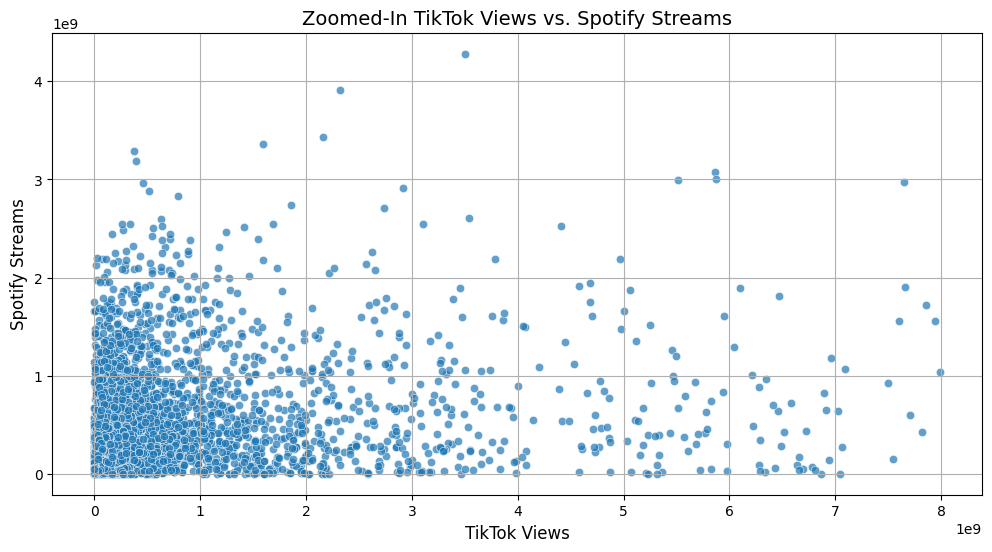

In [ ]:
# Zoom in on higher values
# Set thresholds for "high" values
tiktok_threshold = 8_000_000_000  # Example: TikTok Views < 8M
spotify_threshold = 10_000_000_000  # Example: Spotify Streams < 10M

# Filter dataset to include only tracks meeting the threshold
filtered_df = df[(df['TikTok Views'] < tiktok_threshold) & (df['Spotify Streams'] < spotify_threshold)]

# Scatterplot of filtered data
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_df, x='TikTok Views', y='Spotify Streams', alpha=0.7)
plt.title('Zoomed-In TikTok Views vs. Spotify Streams', fontsize=14)
plt.xlabel('TikTok Views', fontsize=12)
plt.ylabel('Spotify Streams', fontsize=12)
plt.grid(True)
plt.show()

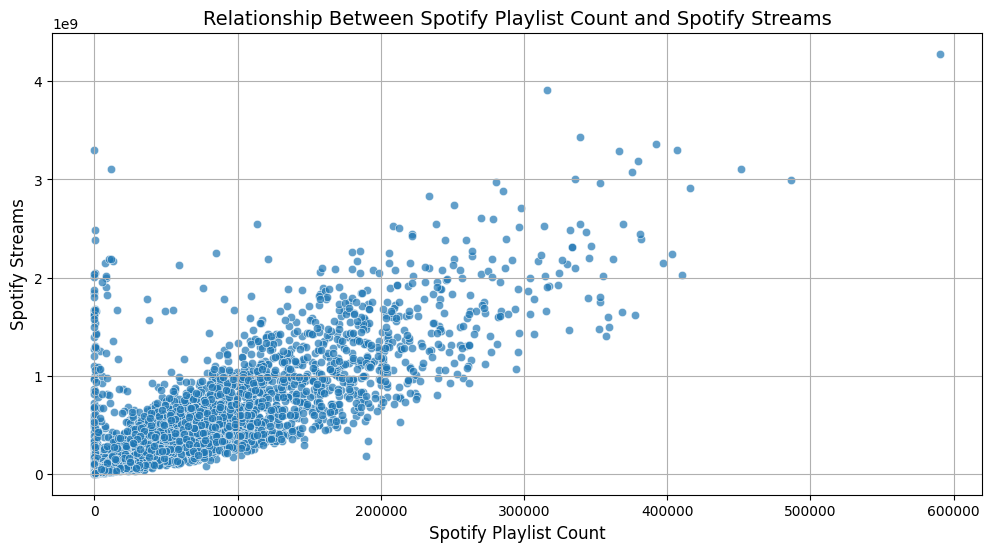

In [ ]:
# Quantitative variables: Spotify Playlist Count and Spotify Streams
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Spotify Playlist Count', y='Spotify Streams', alpha=0.7)
plt.title('Relationship Between Spotify Playlist Count and Spotify Streams', fontsize=14)
plt.xlabel('Spotify Playlist Count', fontsize=12)
plt.ylabel('Spotify Streams', fontsize=12)
plt.grid(True)
plt.show()

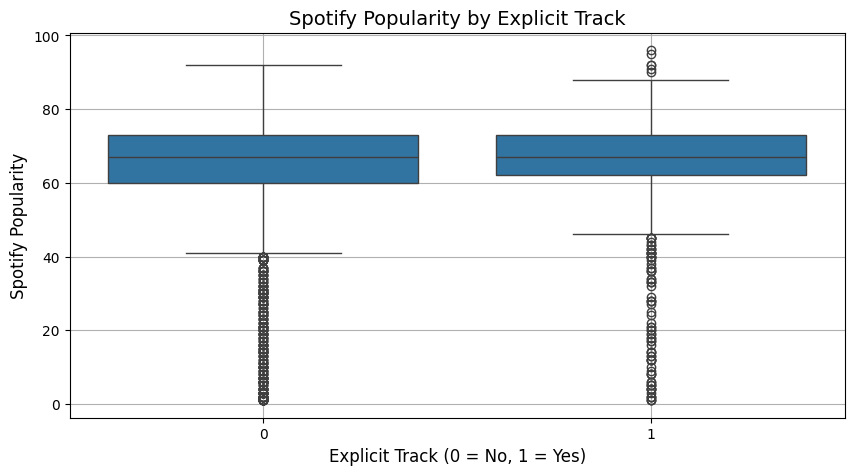

In [ ]:
# Categorical variables: Explicit Track and Spotify Popularity
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Explicit Track', y='Spotify Popularity')
plt.title('Spotify Popularity by Explicit Track', fontsize=14)
plt.xlabel('Explicit Track (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Spotify Popularity', fontsize=12)
plt.grid(True)
plt.show()

<ipython-input-15-3ede16998f70>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_artists, x='Spotify Streams', y='Artist', palette='viridis')


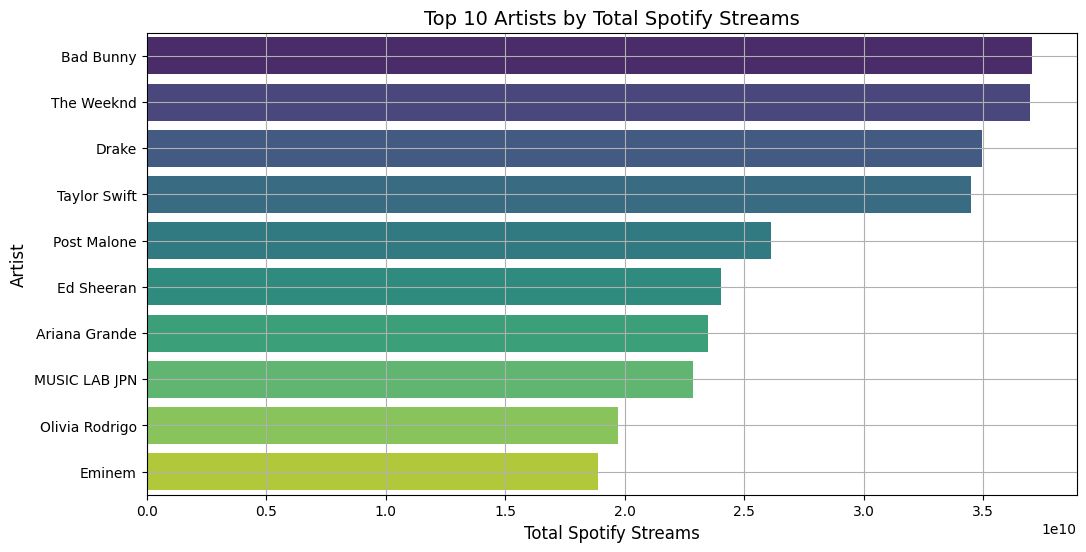

In [ ]:
# Categorical variables: Artist and Spotify Streams (Top 10 Artists)
top_artists = (
    df.groupby('Artist')['Spotify Streams']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_artists, x='Spotify Streams', y='Artist', palette='viridis')
plt.title('Top 10 Artists by Total Spotify Streams', fontsize=14)
plt.xlabel('Total Spotify Streams', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.grid(True)
plt.show()


Observations from Visualizations:
1. TikTok Views vs. Spotify Streams:
  ##### Trend: There's a ?? relationship between TikTok Views and Spotify Streams.
  ##### Relevance: This visualization supports the research question by highlighting TikTok's influence on Spotify performance. It suggests further analysis could quantify the strength of this relationship.


2. Spotify Playlist Count vs. Spotify Streams:

  ##### Trend: A strong positive relationship exists between the number of Spotify Playlists featuring a track and its total streams. Tracks in more playlists naturally receive more exposure and streams.
  ##### Relevance: While not directly linked to TikTok, this highlights another mechanism of popularity on Spotify. Combined with TikTok data, it could reveal whether TikTok boosts playlist inclusion and subsequent streams.


3. Spotify Popularity by Explicit Track:

  ##### Trend: Non-explicit tracks (Explicit Track = 0) have a wider range and slightly higher median popularity scores than explicit tracks. This could reflect broader audience appeal for family-friendly tracks.
  ##### Relevance: While not the primary focus, this suggests explicit content might limit a track's reach or appeal, providing additional context to trends across platforms.


4. Top 10 Artists by Total Spotify Streams:

  ##### Trend: A small number of artists dominate Spotify streams, with these top 10 collectively contributing a substantial portion. These artists may also have significant TikTok presence.
  ##### Relevance: Identifying these artists helps explore whether their dominance extends to TikTok and whether viral trends disproportionately favor them.